# RESEGMENTATION PIPELINE

## Set up source and destination folders

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box


In [4]:
ddir = 'D:\Alexis\Projects\SpatialOmics_cellpose\\results'
base_path = "D:\Alexis\Projects\SpatialOmics_cellpose\data_DRG\output-XETG00245__0058080__Test_Lesion_DRGs_1__20250806__180812"
# Select first and third hannels for segmentation (can only select three) 
fullres_chanel_0 = f"{base_path}\morphology_focus\morphology_focus_0000.ome.tif"   
fullres_chanel_1 = f"{base_path}\morphology_focus\morphology_focus_0001.ome.tif"
fullres_chanel_3 = f"{base_path}\morphology_focus\morphology_focus_0003.ome.tif"

sample_name = "Test_Lesion_DRGs_1"

# comment out if don't have ROI
ROI_filepath = f"{base_path}\{sample_name}_coordinates.csv"

# Levels: pixelsize in µm https://kb.10xgenomics.com/hc/en-us/articles/11636252598925
scalefactors = {
    0: 0.2125,
    1: 0.4250,
    2: 0.85,
    3: 1.7,
    4: 3.4,
    5: 6.8,
    6: 13.6,
    7: 27.2,
}

# Define resolution level and crop size in pixels
level = 0
pixelsize = scalefactors[level]

# Define patch size
crop_size = 600/pixelsize

## Define the region of interest (ROI)

In [5]:

def get_all_sections(filepath):
    """Simple parser for ROI file"""
    
    # Skip the header rows and read the data
    coords = pd.read_csv(filepath, skiprows=2)
    
    # Get all unique sections
    sections = coords['Selection'].unique()
    
    print(f"Found {len(sections)} sections:")
    
    all_sections = []
    
    for section in sections:
        section_data = coords[coords['Selection'] == section]
        
        section_info = {
            'name': section,
            'x_coords': section_data['X'].values,
            'y_coords': section_data['Y'].values,
            'num_points': len(section_data)
        }
        
        all_sections.append(section_info)
        print(f"  - {section}: {len(section_data)} points")
    
    return all_sections

def plot_all_sections(all_sections):
    """Plot all sections"""
    
    plt.figure(figsize=(12, 8))
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for i, section in enumerate(all_sections):
        color = colors[i % len(colors)]
        
        plt.plot(section['x_coords'], section['y_coords'], 
                'o-', color=color, markersize=3, 
                label=f"{section['name']} ({section['num_points']} pts)", 
                alpha=0.8, linewidth=2)
        
        # Close polygon
        if section['num_points'] > 2:
            plt.plot([section['x_coords'][0], section['x_coords'][-1]], 
                    [section['y_coords'][0], section['y_coords'][-1]], 
                    '-', color=color, alpha=0.8, linewidth=2)
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('All ROI Sections')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

Found 4 sections:
  - Selection 1: 87 points
  - Selection 3: 142 points
  - Selection 5: 118 points
  - Selection 6: 134 points


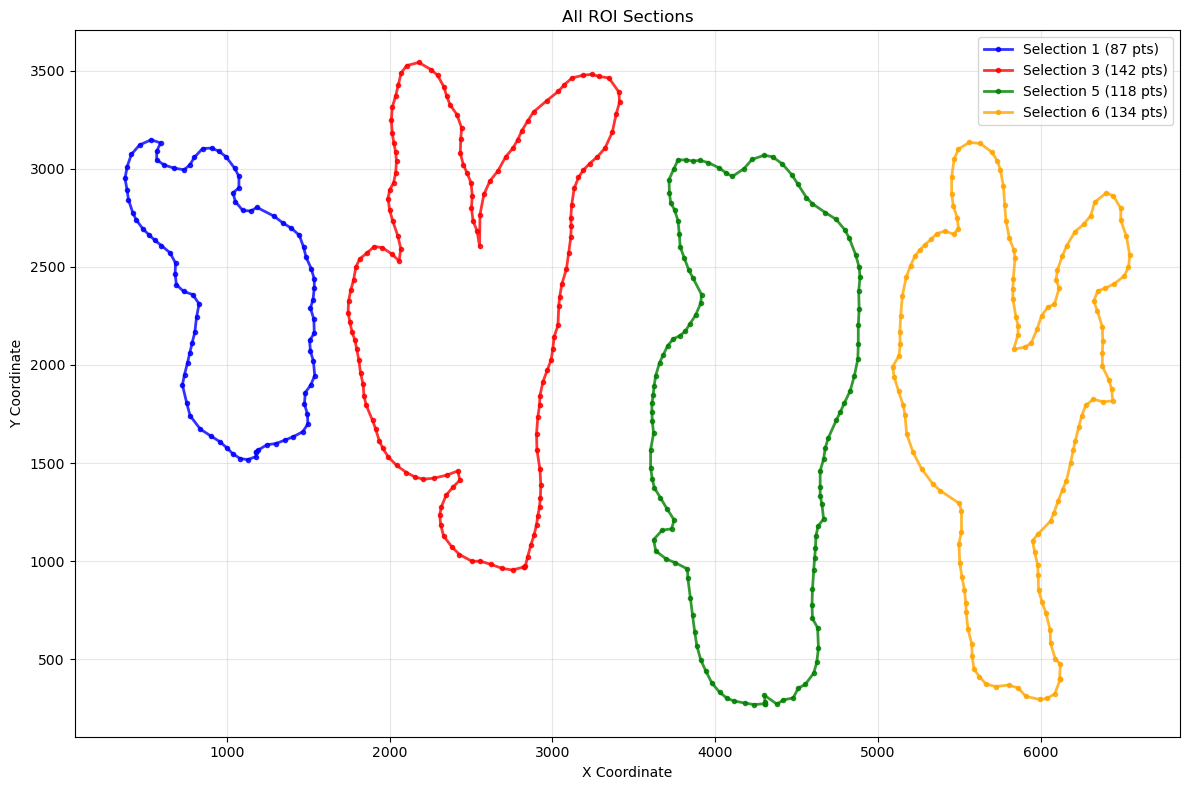

In [6]:
# Get all sections data
all_sections = get_all_sections(ROI_filepath)

# Plot all sections
plot_all_sections(all_sections)

In [7]:
all_sections

[{'name': 'Selection 1',
  'x_coords': array([1180.24138881, 1190.75817462, 1248.60049656, 1301.1844256 ,
         1359.02674754, 1406.35228368, 1466.82380207, 1498.3741595 ,
         1495.74496305, 1477.34058788, 1482.59898079, 1516.77853466,
         1540.44130273, 1532.55371337, 1514.14933821, 1508.89094531,
         1537.81210628, 1535.18290983, 1514.14933821, 1529.92451692,
         1537.81210628, 1537.81210628, 1519.40773111, 1487.85737369,
         1472.08219498, 1445.79023046, 1395.83549787, 1348.50996174,
         1290.66763979, 1185.49978171, 1148.69103139, 1098.7362988 ,
         1054.03995912, 1038.2647804 , 1075.07353073, 1075.07353073,
         1048.78156621,  996.19763717,  951.50129749,  906.80495781,
          851.59183232,  801.63709973,  772.71593876,  738.53638488,
          678.06486649,  617.59334809,  570.26781196,  570.26781196,
          593.93058002,  536.08825808,  465.09995388,  415.14522129,
          388.85325677,  375.70727451,  388.85325677,  396.7408461

In [10]:
# Read the ROI coordinates from the CSV file
from SRC_RESEG.crop_image import *

# # TODO: Comment out if dont have ROI
# plot_roi(ROI_filepath)
# polygon_coords = pd.read_csv(ROI_filepath)

# polygon_coords = all_sections

# # Extract the X and Y coordinates
# x_coords = polygon_coords['X']
# y_coords = polygon_coords['Y']


In [8]:
# mask, masked_img_0 = mask_polygon_from_tif(
#     fullres_chanel_0,
#     x_coords, y_coords,
#     scalefactors,
#     level=0,
#     plot=True
# )

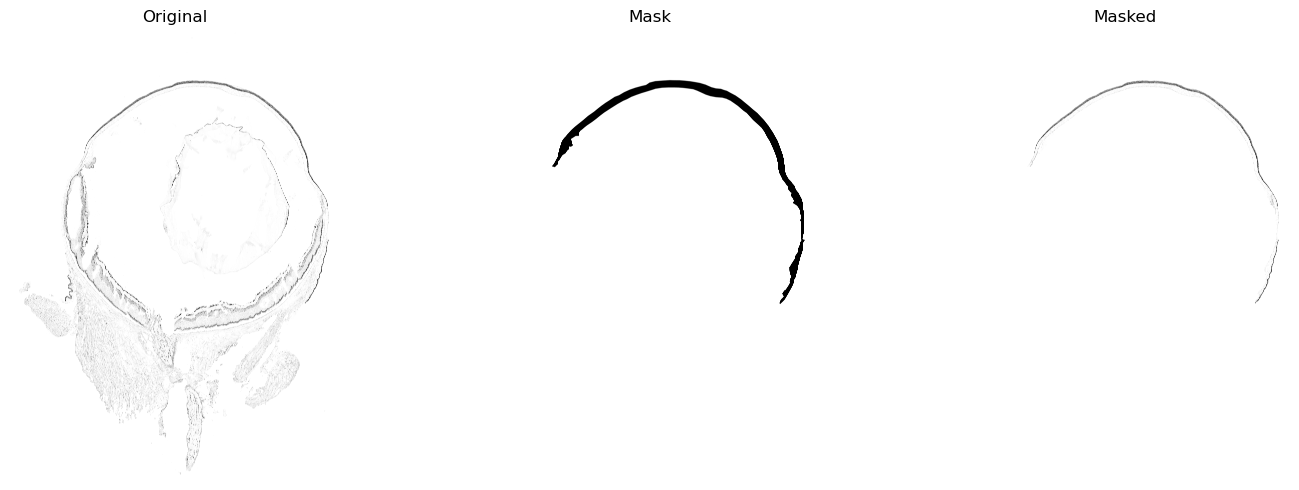

In [ ]:
# mask, masked_img_2 = mask_polygon_from_tif(
#     fullres_chanel_2,
#     x_coords, y_coords,
#     scalefactors,
#     level=0,
#     plot=True
# )

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

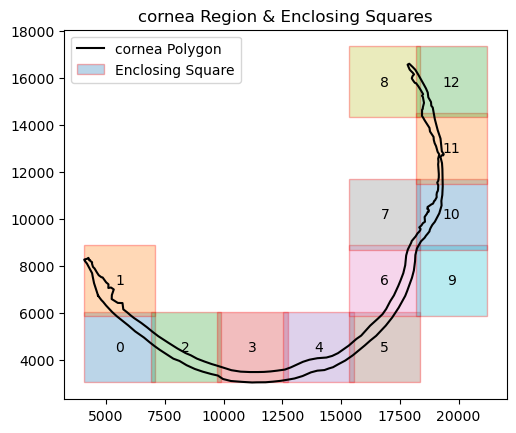

In [ ]:
# # Combine X and Y into coordinate pairs
# x_coords_rescaled = x_coords / pixelsize
# y_coords_rescaled = y_coords / pixelsize
# rescaled_polygon_roi = list(zip(x_coords_rescaled, y_coords_rescaled))

# # Create a Polygon object
# rescaled_polygon_roi = Polygon(rescaled_polygon_roi)

# # Define square size
# square_size = int(crop_size)
# overlap_size = 40/0.2125

# # Generate non-overlapping square regions
# overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, overlap_size=overlap_size, with_overlap=True)
# non_overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, with_overlap=False)


# plot_polygon_and_squares(
#     rescaled_polygon_roi,
#     overlapping_squares,
#     title="cornea Region & Enclosing Squares",
#     polygon_label="cornea Polygon",
#     square_label="Enclosing Square"
# )

# # for square in overlapping_squares:
# #     print("square:", square)
# #     x, y = square.exterior.xy
# #     print(" x:", x,"\n", "y:", y)


### V2

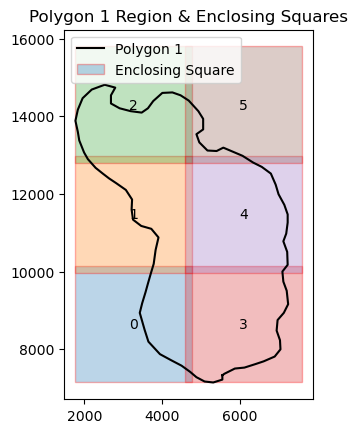

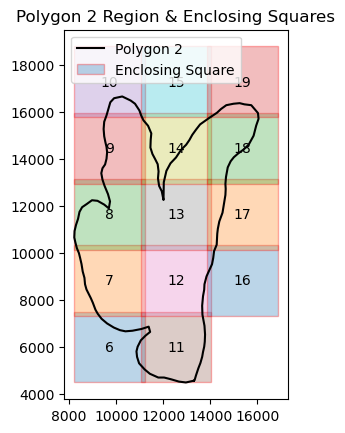

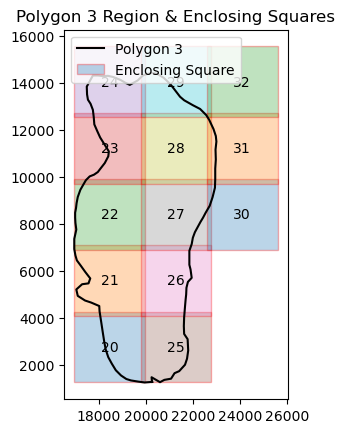

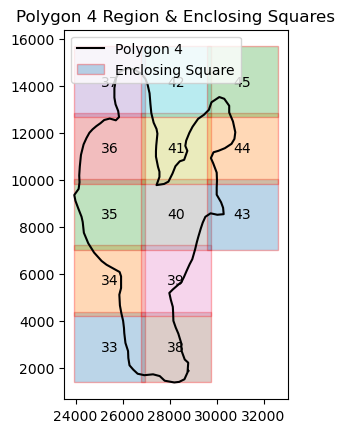

In [11]:
# Process all sections with continuous square numbering
polygon_number = 1
square_counter = 0  # Global square counter

for section in all_sections:
    
    # Get coordinates from section
    x_coords = section['x_coords']
    y_coords = section['y_coords']
    
    # Your original code block (unchanged)
    x_coords_rescaled = x_coords / pixelsize
    y_coords_rescaled = y_coords / pixelsize
    rescaled_polygon_roi = list(zip(x_coords_rescaled, y_coords_rescaled))
    
    # Create a Polygon object
    rescaled_polygon_roi = Polygon(rescaled_polygon_roi)
    
    # Define square size
    square_size = int(crop_size)
    overlap_size = 40/0.2125
    
    # Generate non-overlapping square regions
    overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, overlap_size=overlap_size, with_overlap=True)
    non_overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, with_overlap=False)
    
    # Plot with continuous numbering
    plot_polygon_and_squares_continuous(
        rescaled_polygon_roi,
        overlapping_squares,
        square_counter,  # Pass current counter
        title=f"Polygon {polygon_number} Region & Enclosing Squares",
        polygon_label=f"Polygon {polygon_number}",
        square_label="Enclosing Square"
    )
    
    # Update counters
    square_counter += len(overlapping_squares)  # Increment by number of squares
    polygon_number += 1

In [12]:
import os

In [13]:

# Load the images first (outside the loop for efficiency)
img0 = tifffile.imread(fullres_chanel_0, is_ome=False, level=0)
img1 = tifffile.imread(fullres_chanel_1, is_ome=False, level=0)
img3 = tifffile.imread(fullres_chanel_3, is_ome=False, level=0)

# # Then in your loop:
# for i, square in enumerate(overlapping_squares):
#     print(f"Processing square {i + 1}:", square)
    
#     # Crop the loaded images (not the file paths)
#     cropped_image_sub0 = crop_region(img0, square)  # Use img0, not fullres_chanel_0
#     cropped_image_sub1 = crop_region(img1, square)  # Use img1, not fullres_chanel_1
#     cropped_image_sub3 = crop_region(img3, square)  # Use img1, not fullres_chanel_1

In [14]:
# Process all sections with continuous square numbering
polygon_number = 1
square_counter = 0  # Global square counter

for section in all_sections:
    print(f"\n=== PROCESSING POLYGON {polygon_number} ===")
    
    # Get coordinates from section
    x_coords = section['x_coords']
    y_coords = section['y_coords']
    
    # Your original code block (unchanged)
    x_coords_rescaled = x_coords / pixelsize
    y_coords_rescaled = y_coords / pixelsize
    rescaled_polygon_roi = list(zip(x_coords_rescaled, y_coords_rescaled))
    
    # Create a Polygon object
    rescaled_polygon_roi = Polygon(rescaled_polygon_roi)
    
    # Define square size
    square_size = int(crop_size)
    overlap_size = 40/0.2125
    
    # Generate squares for this polygon
    overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, overlap_size=overlap_size, with_overlap=True)
    
    print(f"Polygon {polygon_number} has {len(overlapping_squares)} squares")
    
    # Process each square in this polygon - MOVE THIS INSIDE THE POLYGON LOOP
    for i, square in enumerate(overlapping_squares):
        global_square_number = square_counter + i + 1
        print(f"Processing square {global_square_number}: {square}")
        
        # ch 0 Crop the region 
        cropped_image_sub0 = crop_region(img0, square)
        # ch2 Crop the region
        cropped_image_sub1 = crop_region(img1, square)
        # ch2 Crop the region
        cropped_image_sub3 = crop_region(img3, square)
        cropped_image_sub_combined = np.stack((cropped_image_sub0, cropped_image_sub1, cropped_image_sub3), axis=0)
        
        # Check if the folder exists, if not create it
        save_dir = f"{ddir}/cropped_image/{sample_name}"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
            print(f"Created directory: {save_dir}")
        
        # Save with continuous numbering
        save_path = f"{save_dir}/cropped_square_com_{global_square_number}.tif"
        tifffile.imwrite(save_path, cropped_image_sub_combined)
        print(f"Cropped image saved to {save_path}")
    
    # Update counters AFTER processing all squares in this polygon
    square_counter += len(overlapping_squares)
    polygon_number += 1
    print(f"Polygon {polygon_number-1} completed. Total squares so far: {square_counter}")

print(f"\n=== FINAL SUMMARY ===")
print(f"Processed {polygon_number-1} polygons")
print(f"Total squares: {square_counter}")


=== PROCESSING POLYGON 1 ===
Polygon 1 has 6 squares
Processing square 1: POLYGON ((4779.235294117647 7141, 4779.235294117647 10152.235294117647, 1768 10152.235294117647, 1768 7141, 4779.235294117647 7141))
Cropped image saved to D:\Alexis\Projects\SpatialOmics_cellpose\results/cropped_image/Test_Lesion_DRGs_1/cropped_square_com_1.tif
Processing square 2: POLYGON ((4779.235294117647 9964, 4779.235294117647 12975.235294117647, 1768 12975.235294117647, 1768 9964, 4779.235294117647 9964))
Cropped image saved to D:\Alexis\Projects\SpatialOmics_cellpose\results/cropped_image/Test_Lesion_DRGs_1/cropped_square_com_2.tif
Processing square 3: POLYGON ((4779.235294117647 12787, 4779.235294117647 15798.235294117647, 1768 15798.235294117647, 1768 12787, 4779.235294117647 12787))
Cropped image saved to D:\Alexis\Projects\SpatialOmics_cellpose\results/cropped_image/Test_Lesion_DRGs_1/cropped_square_com_3.tif
Processing square 4: POLYGON ((7602.235294117647 7141, 7602.235294117647 10152.235294117647

## CELLPOSE - SEGMENTATION

In [15]:
from SRC_RESEG.segmentation_cp import *




Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	win32 
python version: 	3.11.10 
torch version:  	2.7.1+cu126! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




In [16]:
model = models.CellposeModel(gpu=True,
                             pretrained_model='D:\Alexis\Projects\SpatialOmics_cellpose\models\cpsam_Xenium_LDR'
                             )

In [17]:
# Example usage
total = process_images_in_folder(
    input_folder = f'{ddir}/cropped_image/{sample_name}',      
    output_folder = f'{ddir}/segmenatation/{sample_name}',
    cellpose_model = model
)

print(f"Total cells detected: {total}")

channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Processing file: cropped_square_com_1.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_1.tif: 399


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_1.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_1

Processing file: cropped_square_com_10.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_10.tif: 397


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_10.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_10

Processing file: cropped_square_com_11.tif, shape: (3, 1337, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_11.tif: 84


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_11.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_11

Processing file: cropped_square_com_12.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_12.tif: 530


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_12.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_12

Processing file: cropped_square_com_13.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_13.tif: 947


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_13.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_13

Processing file: cropped_square_com_14.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_14.tif: 634


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_14.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_14

Processing file: cropped_square_com_15.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_15.tif: 166


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_15.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_15

Processing file: cropped_square_com_16.tif, shape: (3, 1337, 3011)


no masks found, will not save PNG or outlines


Mask Segmentation Down!
Number of detected regions in cropped_square_com_16.tif: 0


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_16.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_16

Processing file: cropped_square_com_17.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_17.tif: 1


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_17.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_17

Processing file: cropped_square_com_18.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_18.tif: 69


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_18.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_18

Processing file: cropped_square_com_19.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_19.tif: 175


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_19.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_19

Processing file: cropped_square_com_2.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_2.tif: 416


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_2.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_2

Processing file: cropped_square_com_20.tif, shape: (3, 1337, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_20.tif: 22


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_20.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_20

Processing file: cropped_square_com_21.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_21.tif: 514


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_21.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_21

Processing file: cropped_square_com_22.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_22.tif: 1067


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_22.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_22

Processing file: cropped_square_com_23.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_23.tif: 1522


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_23.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_23

Processing file: cropped_square_com_24.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_24.tif: 581


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_24.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_24

Processing file: cropped_square_com_25.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_25.tif: 287


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_25.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_25

Processing file: cropped_square_com_26.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_26.tif: 507


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_26.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_26

Processing file: cropped_square_com_27.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_27.tif: 668


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_27.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_27

Processing file: cropped_square_com_28.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_28.tif: 702


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_28.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_28

Processing file: cropped_square_com_29.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_29.tif: 379


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_29.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_29

Processing file: cropped_square_com_3.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_3.tif: 300


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_3.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_3

Processing file: cropped_square_com_30.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_30.tif: 129


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_30.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_30

Processing file: cropped_square_com_31.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_31.tif: 592


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_31.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_31

Processing file: cropped_square_com_32.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_32.tif: 517


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_32.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_32

Processing file: cropped_square_com_33.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_33.tif: 2


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_33.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_33

Processing file: cropped_square_com_34.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_34.tif: 132


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_34.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_34

Processing file: cropped_square_com_35.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_35.tif: 343


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_35.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_35

Processing file: cropped_square_com_36.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_36.tif: 1335


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_36.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_36

Processing file: cropped_square_com_37.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_37.tif: 866


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_37.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_37

Processing file: cropped_square_com_38.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_38.tif: 115


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_38.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_38

Processing file: cropped_square_com_39.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_39.tif: 326


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_39.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_39

Processing file: cropped_square_com_4.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_4.tif: 825


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_4.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_4

Processing file: cropped_square_com_40.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_40.tif: 435


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_40.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_40

Processing file: cropped_square_com_41.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_41.tif: 1005


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_41.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_41

Processing file: cropped_square_com_42.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_42.tif: 301


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_42.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_42

Processing file: cropped_square_com_43.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_43.tif: 25


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_43.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_43

Processing file: cropped_square_com_44.tif, shape: (3, 3011, 1727)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_44.tif: 33


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_44.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_44

Processing file: cropped_square_com_45.tif, shape: (3, 3011, 1727)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_45.tif: 166


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_45.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_45

Processing file: cropped_square_com_46.tif, shape: (3, 3011, 1727)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_46.tif: 18


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_46.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_46

Processing file: cropped_square_com_47.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_47.tif: 325


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_47.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_47

Processing file: cropped_square_com_48.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_48.tif: 488


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_48.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_48

Processing file: cropped_square_com_49.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_49.tif: 1045


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_49.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_49

Processing file: cropped_square_com_5.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_5.tif: 598


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_5.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_5

Processing file: cropped_square_com_50.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_50.tif: 315


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_50.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_50

Processing file: cropped_square_com_51.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_51.tif: 42


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_51.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_51

Processing file: cropped_square_com_52.tif, shape: (3, 3011, 1840)


no seeds found in get_masks_torch - no masks found.
no masks found, will not save PNG or outlines


Mask Segmentation Down!
Number of detected regions in cropped_square_com_52.tif: 0


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_52.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_52

Processing file: cropped_square_com_53.tif, shape: (3, 3011, 1840)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_53.tif: 50


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_53.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_53

Processing file: cropped_square_com_54.tif, shape: (3, 3011, 1840)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_54.tif: 164


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_54.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_54

Processing file: cropped_square_com_55.tif, shape: (3, 3011, 1840)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_55.tif: 28


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_55.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_55

Processing file: cropped_square_com_6.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_6.tif: 23


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_6.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_6

Processing file: cropped_square_com_7.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_7.tif: 175


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_7.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_7

Processing file: cropped_square_com_8.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_8.tif: 1298


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_8.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_8

Processing file: cropped_square_com_9.tif, shape: (3, 3011, 3011)
Mask Segmentation Down!
Number of detected regions in cropped_square_com_9.tif: 811
Segmentation output saved to 'segmented_output_seg.npy'
Output of [cropped_square_com_9.tif] saved as: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1\cropped_square_com_9

Total cells detected: 22894


## Merge

In [18]:
from SRC_RESEG.merge import *

In [ ]:
# ROI_filepath = f"{base_path}\{sample_name}_coords.csv"

In [20]:
# Process all sections and collect ALL squares (no image saving)
polygon_number = 1
square_counter = 0
all_overlapping_squares = []      # Collect from all polygons
all_non_overlapping_squares = []  # Collect from all polygons

for section in all_sections:
    print(f"Processing Polygon {polygon_number}...")
    
    # Get coordinates from section
    x_coords = section['x_coords']
    y_coords = section['y_coords']
    
    # Rescale coordinates
    x_coords_rescaled = x_coords / pixelsize
    y_coords_rescaled = y_coords / pixelsize
    rescaled_polygon_roi = list(zip(x_coords_rescaled, y_coords_rescaled))
    
    # Create a Polygon object
    rescaled_polygon_roi = Polygon(rescaled_polygon_roi)
    
    # Define square size
    square_size = int(crop_size)
    overlap_size = 40/0.2125
    
    # Generate squares for this polygon
    overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, overlap_size=overlap_size, with_overlap=True)
    non_overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, with_overlap=False)
    
    # Add squares to the master lists
    all_overlapping_squares.extend(overlapping_squares)
    all_non_overlapping_squares.extend(non_overlapping_squares)
    
    print(f"  - Polygon {polygon_number}: {len(overlapping_squares)} overlapping, {len(non_overlapping_squares)} non-overlapping squares")
    
    polygon_number += 1

print(f"\nTotal squares from all polygons:")
print(f"  - Overlapping squares: {len(all_overlapping_squares)}")
print(f"  - Non-overlapping squares: {len(all_non_overlapping_squares)}")

# Map centroids using ALL squares from ALL polygons
input_dir = f"{ddir}/segmenatation/{sample_name}"

print(f"\nMapping centroids...")
centroids_dict = load_and_offset_centroids(input_dir, all_overlapping_squares)
mapped_df, outside_df, cell_mapping = map_centroids_to_nonoverlapping(centroids_dict, all_non_overlapping_squares)
filtered_outlines_list, outline_info = map_and_filter_outlines(input_dir, all_overlapping_squares, cell_mapping)

print(f"Centroids mapping completed!")

Processing Polygon 1...
  - Polygon 1: 6 overlapping, 6 non-overlapping squares
Processing Polygon 2...
  - Polygon 2: 14 overlapping, 14 non-overlapping squares
Processing Polygon 3...
  - Polygon 3: 13 overlapping, 13 non-overlapping squares
Processing Polygon 4...
  - Polygon 4: 13 overlapping, 13 non-overlapping squares

Total squares from all polygons:
  - Overlapping squares: 46
  - Non-overlapping squares: 46

Mapping centroids...
Found 57 centroid files

Found files:
  cropped_square_com_10_centroids.csv
  cropped_square_com_11_centroids.csv
  cropped_square_com_12_centroids.csv
  cropped_square_com_13_centroids.csv
  cropped_square_com_14_centroids.csv
  cropped_square_com_15_centroids.csv
  cropped_square_com_16_centroids.csv
  cropped_square_com_17_centroids.csv
  cropped_square_com_18_centroids.csv
  cropped_square_com_19_centroids.csv
  cropped_square_com_1_centroids.csv
  cropped_square_com_20_centroids.csv
  cropped_square_com_21_centroids.csv
  cropped_square_com_22_cen

Multiprocessing is disabled for Windows


Region 21: Processed 514 outlines


Multiprocessing is disabled for Windows


Region 22: Processed 1067 outlines
Region 23: Processed 1522 outlines
Region 24: Processed 581 outlines
Region 25: Processed 284 outlines
Region 26: Processed 502 outlines
Region 27: Processed 663 outlines
Region 28: Processed 702 outlines
Region 29: Processed 379 outlines
Region 2: Processed 416 outlines
Region 30: Processed 126 outlines
Region 31: Processed 592 outlines
Region 32: Processed 517 outlines
Region 33: Processed 2 outlines
Region 34: Processed 132 outlines


Multiprocessing is disabled for Windows


Region 35: Processed 343 outlines
Region 36: Processed 1335 outlines
Region 37: Processed 866 outlines
Region 38: Processed 113 outlines
Region 39: Processed 326 outlines
Region 3: Processed 288 outlines


Multiprocessing is disabled for Windows


Region 40: Processed 435 outlines
Region 41: Processed 1005 outlines
Region 42: Processed 301 outlines
Region 43: Processed 24 outlines
Region 44: Processed 33 outlines
Region 45: Processed 166 outlines
Region 46: Processed 18 outlines
Region 4: Processed 820 outlines
Region 5: Processed 598 outlines
Region 6: Processed 22 outlines


Multiprocessing is disabled for Windows


Region 7: Processed 175 outlines
Region 8: Processed 1298 outlines
Region 9: Processed 811 outlines
Centroids mapping completed!


In [ ]:
# input_dir = f"{ddir}/segmenatation/{sample_name}"

# # 1. Load and offset centroids
# centroids_dict = load_and_offset_centroids(input_dir, overlapping_squares)

# # 2. Map centroids and get cell mapping
# mapped_df, outside_df, cell_mapping = map_centroids_to_nonoverlapping(centroids_dict, non_overlapping_squares)

# # 3. Load and map outlines
# filtered_outlines_list, outline_info = map_and_filter_outlines(input_dir, overlapping_squares, cell_mapping)



Found 55 centroid files

Found files:
  cropped_square_com_10_centroids.csv
  cropped_square_com_11_centroids.csv
  cropped_square_com_12_centroids.csv
  cropped_square_com_13_centroids.csv
  cropped_square_com_14_centroids.csv
  cropped_square_com_15_centroids.csv
  cropped_square_com_16_centroids.csv
  cropped_square_com_17_centroids.csv
  cropped_square_com_18_centroids.csv
  cropped_square_com_19_centroids.csv
  cropped_square_com_1_centroids.csv
  cropped_square_com_20_centroids.csv
  cropped_square_com_21_centroids.csv
  cropped_square_com_22_centroids.csv
  cropped_square_com_23_centroids.csv
  cropped_square_com_24_centroids.csv
  cropped_square_com_25_centroids.csv
  cropped_square_com_26_centroids.csv
  cropped_square_com_27_centroids.csv
  cropped_square_com_28_centroids.csv
  cropped_square_com_29_centroids.csv
  cropped_square_com_2_centroids.csv
  cropped_square_com_30_centroids.csv
  cropped_square_com_31_centroids.csv
  cropped_square_com_32_centroids.csv
  cropped_squa

In [21]:

def visualize_mapped_centroids_with_sections(result_df, outside_df, non_overlapping_squares, all_sections, pixelsize, figsize=(15, 15)):
    """
    Visualizes the mapped centroids, squares, and section polygons.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot section polygons first (with alpha)
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for i, section in enumerate(all_sections):
        # Rescale section coordinates
        x_coords_rescaled = section['x_coords'] / pixelsize
        y_coords_rescaled = section['y_coords'] / pixelsize
        
        color = colors[i % len(colors)]
        
        # Plot section boundary
        ax.plot(x_coords_rescaled, y_coords_rescaled, 
                color=color, linewidth=2, alpha=0.5,
                label=f"{section['name']}")
        
        # Fill section area with alpha
        ax.fill(x_coords_rescaled, y_coords_rescaled, 
                color=color, alpha=0.1)
        
        # Close the polygon line
        if len(x_coords_rescaled) > 2:
            ax.plot([x_coords_rescaled[0], x_coords_rescaled[-1]], 
                    [y_coords_rescaled[0], y_coords_rescaled[-1]], 
                    color=color, linewidth=2, alpha=0.5)
    
    # Plot non-overlapping squares
    for idx, square in enumerate(non_overlapping_squares):
        x, y = square.exterior.xy
        ax.plot(x, y, 'k-', linewidth=1, alpha=0.5)
        # Add region number label
        centroid = square.centroid
        ax.text(centroid.x, centroid.y, str(idx + 1), 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    # Plot mapped centroids
    if not result_df.empty:
        scatter = ax.scatter(result_df['centroid_x'], result_df['centroid_y'], 
                           c=result_df['mapped_region'], 
                           cmap='tab20', 
                           alpha=0.6, 
                           s=20,
                           label='Mapped points')
        # Make colorbar smaller and horizontal under the plot
        cbar = plt.colorbar(scatter, label='Mapped Region', 
                           orientation='horizontal', 
                           shrink=0.6, 
                           aspect=30,
                           pad=0.1)
    
    ax.set_title('Mapped Centroids with Section Boundaries and Regions')
    # Make the legend font smaller by setting fontsize
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

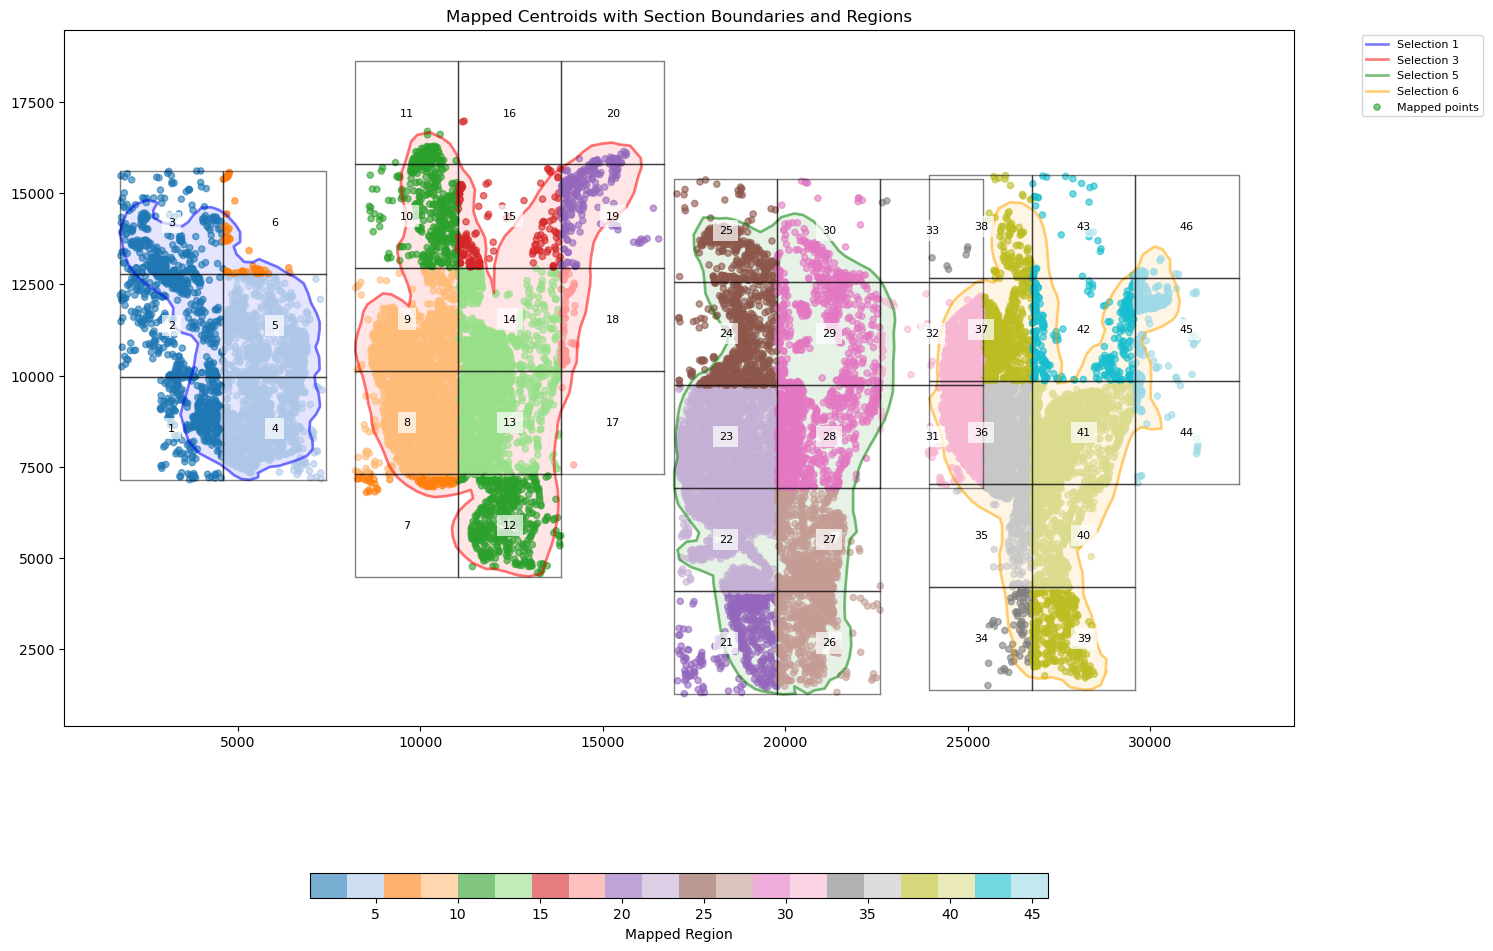


Results saved to: D:\Alexis\Projects\SpatialOmics_cellpose\results/segmenatation/Test_Lesion_DRGs_1


In [22]:
# 4. Visualize results
visualize_mapped_centroids_with_sections(mapped_df, outside_df, all_non_overlapping_squares, all_sections, pixelsize)

# 5. Save results
output_dir = input_dir
mapped_df.to_csv(os.path.join(output_dir, 'mapped_centroids.csv'), index=False)
if not outside_df.empty:
    outside_df.to_csv(os.path.join(output_dir, 'unmapped_centroids.csv'), index=False)
outline_info.to_csv(os.path.join(output_dir, 'outline_mapping.csv'), index=False)
print(f"\nResults saved to: {output_dir}")

In [ ]:
# # Function to map segmentation outlines back to original coordinates
# def map_to_original_coordinates(outlines, offset):

#     min_x, min_y = offset
    
#     return [outline + np.array([min_x, min_y]) for outline in outlines]

# outlines_list = []


# # Example processing loop for 3 cropped regions
# for i, square in enumerate(overlapping_squares):
    
#     # Stop the loop when i = 30 if 6 picture, set i + 1 = 5
#     if i + 1 == 29:
#         i1 = i + 1
#         print("Reached the stopping condition: number = {i1}. Exiting the loop.")
#         break

#     print(f"Processing square {i + 1}: {square}")
    
#     # Get bounding box of the current polygon (cropped region)
#     min_x, min_y, max_x, max_y = map(int, square.bounds)

#     # Load the segmentation result for the cropped region
#     # segmentation_file = f"{ddir}/segmenatation/{sample_name}/cropped_square_com_{i + 1}_seg.npy"
#     segmentation_file = f"{ddir}/segmenatation/{sample_name}/cropped_square_com_{i + 1}_seg.npy"
#     segmentation_data = np.load(segmentation_file, allow_pickle=True).item()
    
#     # Extract outlines from    the segmentation
#     outlines = utils.outlines_list(segmentation_data['masks'])

#     # Map outlines back to original coordinates
#     mapped_outlines = map_to_original_coordinates(outlines, (min_x, min_y))
#     outlines_list.extend(mapped_outlines)

Processing square 1: POLYGON ((26842.235294117647 1247, 26842.235294117647 4258.235294117647, 23831 4258.235294117647, 23831 1247, 26842.235294117647 1247))
Processing square 2: POLYGON ((26842.235294117647 4070, 26842.235294117647 7081.235294117647, 23831 7081.235294117647, 23831 4070, 26842.235294117647 4070))
Processing square 3: POLYGON ((26842.235294117647 6893, 26842.235294117647 9904.235294117647, 23831 9904.235294117647, 23831 6893, 26842.235294117647 6893))
Processing square 4: POLYGON ((26842.235294117647 9716, 26842.235294117647 12727.235294117647, 23831 12727.235294117647, 23831 9716, 26842.235294117647 9716))
Processing square 5: POLYGON ((26842.235294117647 12539, 26842.235294117647 15550.235294117647, 23831 15550.235294117647, 23831 12539, 26842.235294117647 12539))
Processing square 6: POLYGON ((29665.235294117647 1247, 29665.235294117647 4258.235294117647, 26654 4258.235294117647, 26654 1247, 29665.235294117647 1247))
Processing square 7: POLYGON ((29665.235294117647 4

In [ ]:
 # reuse previous function

In [23]:
df_outlines_list = boundaries_to_table(filtered_outlines_list)

import pandas as pd

def close_cell_boundaries(df):
    closed_df = []

    for cell_id, group in df.groupby('cell_id'):
        group_closed = pd.concat([group, group.iloc[[0]]])  # Append first row at end
        closed_df.append(group_closed)

    return pd.concat(closed_df).reset_index(drop=True)

df_outlines_list = close_cell_boundaries(df_outlines_list)



In [25]:
df_outlines_list.to_csv(f"{ddir}/segmenatation/{sample_name}/cellpose_cell_boundaries_origian_{sample_name}.csv", index=False)
print("Saved successly" )

Saved successly


In [ ]:
# # Apply the function
# reduced_outlines_list = reduce_points(df_outlines_list)

# # Print the results
# print("Original shape:", df_outlines_list.shape)
# print("Reduced shape:", reduced_outlines_list.shape)

Original shape: (3274038, 3)
Reduced shape: (1949428, 3)


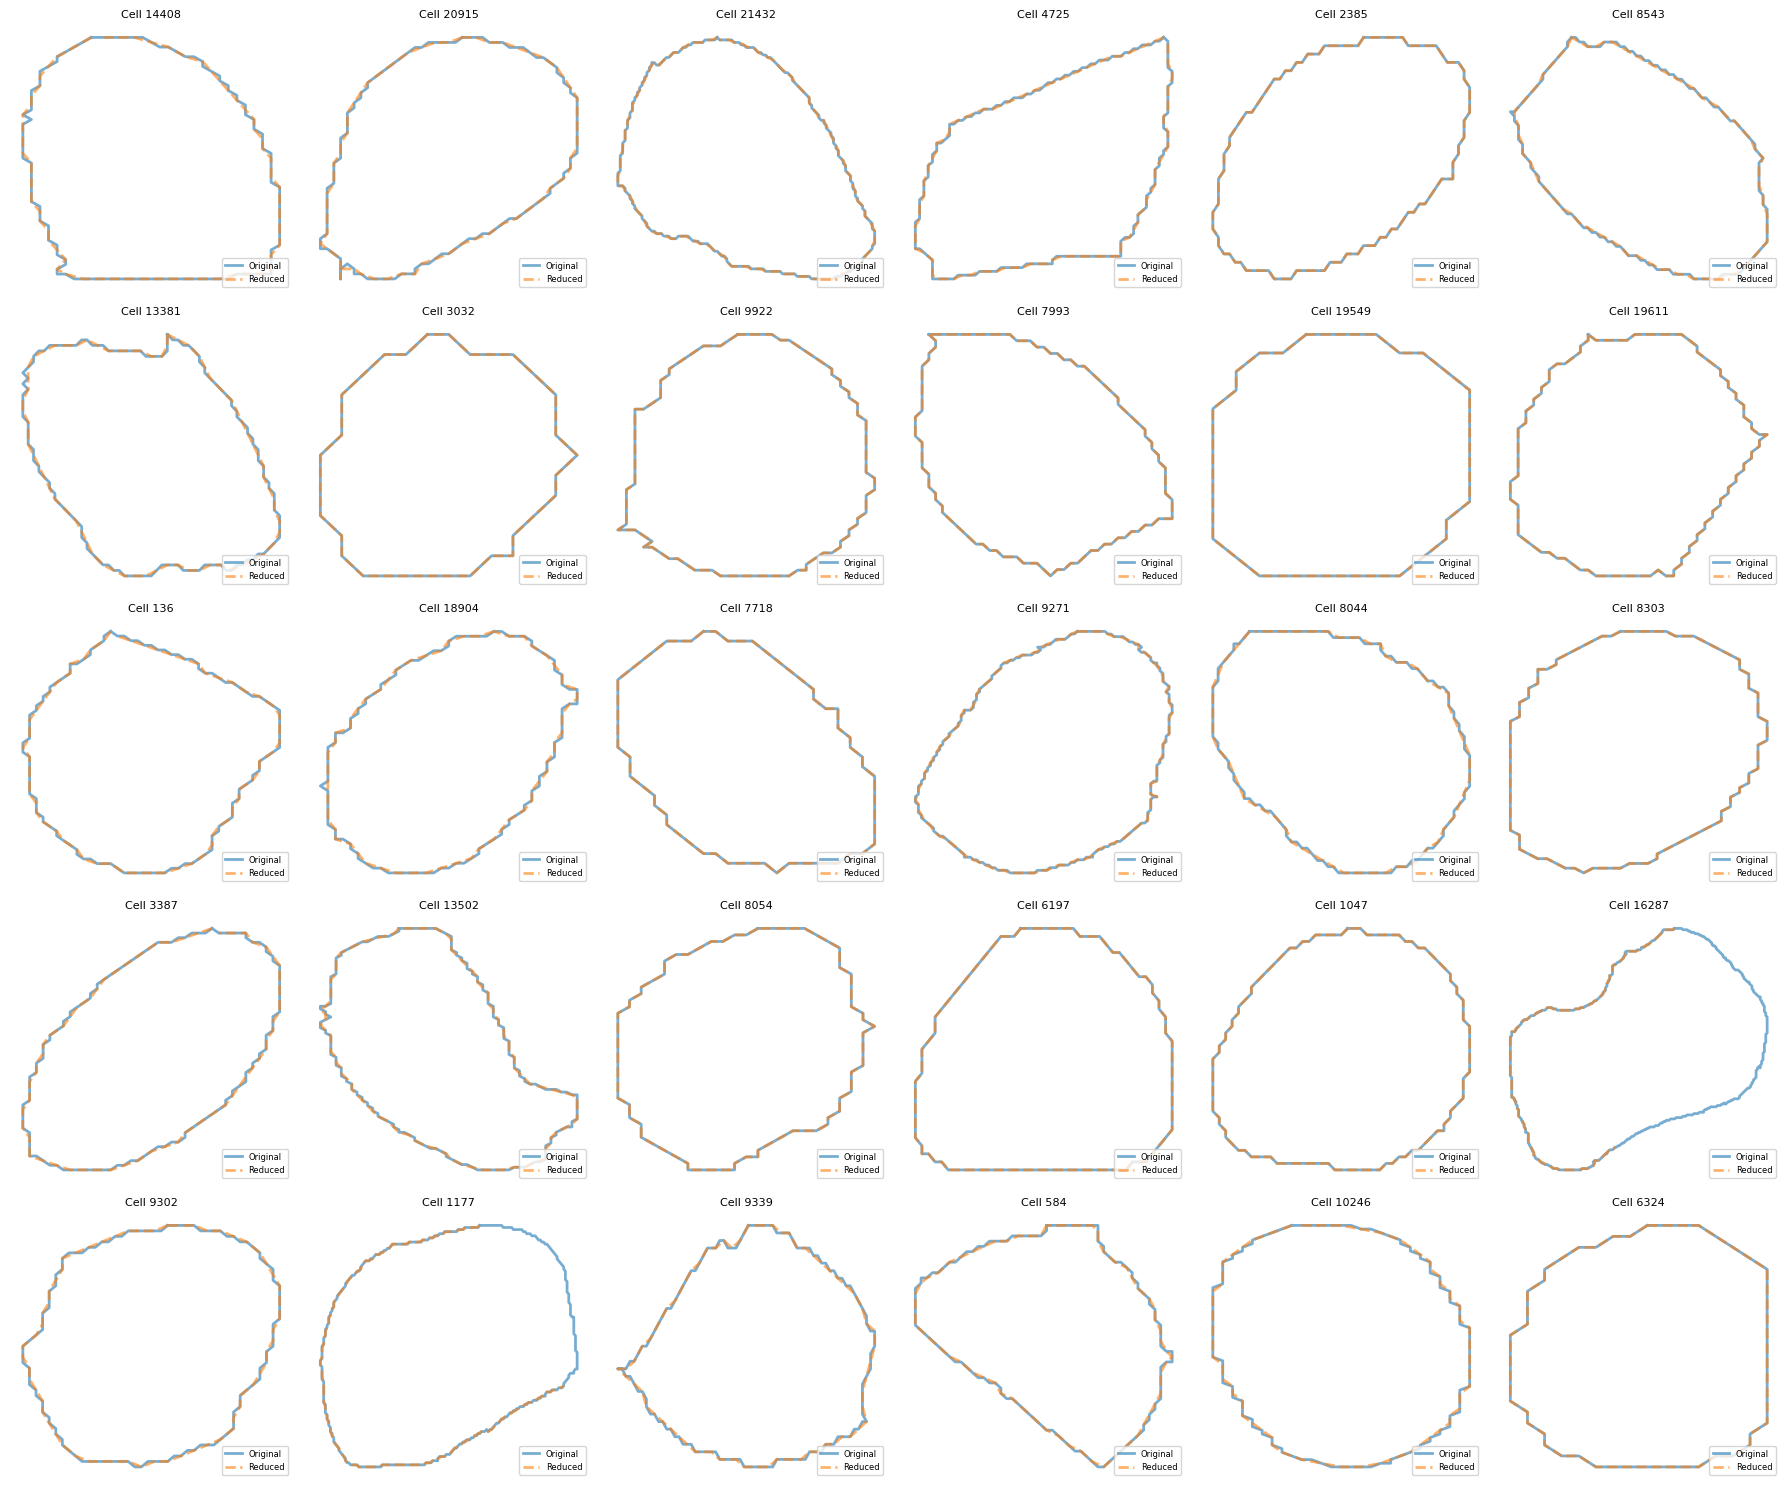

In [ ]:
# # Visulize before reduce size
# import matplotlib.pyplot as plt
# import numpy as np

# def plot_cell_outlines_comparison(df_orig, df_reduced, n=30, rows=5, cols=6):
#     # find cell IDs present in both dataframes
#     common_ids = np.intersect1d(df_orig['cell_id'].unique(),
#                                 df_reduced['cell_id'].unique())
#     # sample up to n cells
#     ids = np.random.choice(common_ids, min(n, len(common_ids)), replace=False)

#     fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
#     axes = axes.flatten()
#     for ax, cell_id in zip(axes, ids):
#         orig = df_orig[df_orig['cell_id'] == cell_id]
#         red  = df_reduced[df_reduced['cell_id'] == cell_id]

#         # original outline
#         ax.plot(orig['vertex_x'], orig['vertex_y'],
#                 linewidth=2, label='Original', alpha=0.6)
#         # reduced outline
#         ax.plot(red['vertex_x'],  red['vertex_y'],
#                 linewidth=2, linestyle='--', label='Reduced', alpha=0.6)

#         ax.set_title(f'Cell {cell_id}', fontsize=8)
#         ax.invert_yaxis()
#         ax.axis('off')
#         ax.legend(loc='lower right', fontsize=6)

#     # turn off any extra axes
#     for ax in axes[len(ids):]:
#         ax.axis('off')

#     plt.tight_layout()
#     plt.show()

# # usage
# plot_cell_outlines_comparison(df_outlines_list, reduced_outlines_list)



In [ ]:
# TODO: SAVE BOUNDARIES ONE BY ONE

In [26]:
# Don't reduced points here
df_outlines_list.to_csv(f'{ddir}/segmenatation/{sample_name}/cellpose_cell_boundaries_{sample_name}.csv', index=False)
print("Saved successly" )

Saved successly


In [27]:
unique_cell_count = df_outlines_list['cell_id'].nunique()
# unique_cell_count = boundary_df['cell_id'].nunique()

unique_cell_count

20383

In [28]:
# Calculate centroids for each cell
centroids_df = calculate_centroids(df_outlines_list)
centroids_df

,cell_id,centroid_x,centroid_y
0,1,10798.647619,12974.380952
1,2,10331.023077,12985.338462
2,3,10968.034247,12987.280822
3,4,10283.351145,12994.587786
4,5,10295.966667,13028.375000
...,...,...,...
20378,20379,10149.500000,13097.696429
20379,20380,10625.470968,13093.967742
20380,20381,10228.311475,13124.073770
20381,20382,10465.428571,13127.030612


In [34]:
centroids_df_scaled = centroids_df.copy()
rescale_factor = 0.2125
centroids_df_scaled['centroid_x'] *= rescale_factor
centroids_df_scaled['centroid_y'] *= rescale_factor

In [35]:
centroids_df_scaled.to_csv(f'{ddir}/segmenatation/{sample_name}/cellpose_cell_centroids_{sample_name}.csv', index=False)
print("Saved successly" )

Saved successly


In [ ]:
# TODO: SAVE CNETROIDS ONE BY ONE

In [36]:
# Process to append the first row of each cell group
Outlines_list_final = (
    df_outlines_list.groupby('cell_id', group_keys=False)
    .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))
)

Outlines_list_final

C:\Users\Alexis\AppData\Local\Temp\ipykernel_15264\3586336543.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))


,cell_id,vertex_x,vertex_y
0,1,10791,12964
1,1,10790,12965
2,1,10789,12965
3,1,10788,12965
4,1,10787,12966
...,...,...,...
115,20383,10529,13114
116,20383,10528,13114
117,20383,10527,13114
118,20383,10526,13114


In [37]:
Outlines_list_final_scaled = Outlines_list_final.copy()
rescale_factor = 0.2125
Outlines_list_final_scaled['vertex_x'] *= rescale_factor
Outlines_list_final_scaled['vertex_y'] *= rescale_factor

In [38]:
Outlines_list_final.to_csv(f'{ddir}/segmenatation/{sample_name}/cellpose_cell_boundaries_pixel_{sample_name}.csv', index=False)
print("Saved successly" )

Saved successly


In [39]:
Outlines_list_final_scaled.to_csv(f'{ddir}/segmenatation/{sample_name}/cellpose_cell_boundaries_{sample_name}.csv', index=False)
print("Saved successly" )

Saved successly


## Assign Transcripts

In [40]:
import pandas as pd
boundaries_df_origin = pd.read_csv(f'{ddir}/segmenatation/{sample_name}/cellpose_cell_boundaries_{sample_name}.csv')
print("Data boundaries table file successfully")

boundaries_df_origin

Data boundaries table file successfully


,cell_id,vertex_x,vertex_y
0,1,2293.0875,2754.8500
1,1,2292.8750,2755.0625
2,1,2292.6625,2755.0625
3,1,2292.4500,2755.0625
4,1,2292.2375,2755.2750
...,...,...,...
3136830,20383,2237.4125,2786.7250
3136831,20383,2237.2000,2786.7250
3136832,20383,2236.9875,2786.7250
3136833,20383,2236.7750,2786.7250


In [41]:
boundaries_df = boundaries_df_origin

In [42]:
transcripts_original = pd.read_parquet(f'{base_path}/transcripts.parquet')

# Print information about the data frame
transcripts_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30809946 entries, 0 to 30809945
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   transcript_id      uint64 
 1   cell_id            object 
 2   overlaps_nucleus   uint8  
 3   feature_name       object 
 4   x_location         float32
 5   y_location         float32
 6   z_location         float32
 7   qv                 float32
 8   fov_name           object 
 9   nucleus_distance   float32
 10  codeword_index     int32  
 11  codeword_category  object 
 12  is_gene            bool   
dtypes: bool(1), float32(5), int32(1), object(4), uint64(1), uint8(1)
memory usage: 1.9+ GB


In [43]:
# Filter transcripts with qv score > 20
transcripts_b4_assign = transcripts_original[transcripts_original['qv'] > 20]

# Print information about the filtered dataframe
print("Original number of transcripts:", len(transcripts_original))
print("Number of transcripts after filtering (qv > 20):", len(transcripts_b4_assign))
print("\nPercentage of transcripts retained:", 
      round(len(transcripts_b4_assign) / len(transcripts_original) * 100, 2), "%")

# Display first few rows of filtered dataframe
print("\nFirst few rows of filtered data:")
print(transcripts_b4_assign.head())

Original number of transcripts: 30809946
Number of transcripts after filtering (qv > 20): 19441764

Percentage of transcripts retained: 63.1 %

First few rows of filtered data:
     transcript_id     cell_id  overlaps_nucleus feature_name  x_location  \
0  281569466037075  UNASSIGNED                 0        Aldoa   72.750000   
1  281569466059970  UNASSIGNED                 0          Fus   99.093750   
2  281569466095153  UNASSIGNED                 0         Klf6   18.375000   
3  281569466058992  UNASSIGNED                 0         Rnh1  213.000000   
4  281569466018426  UNASSIGNED                 0         Stac  173.265625   

    y_location  z_location     qv fov_name  nucleus_distance  codeword_index  \
0  2194.640625   12.812500  40.00       E6         668.25000           10548   
1  2165.359375   12.625000  40.00       E6         642.78125           10452   
2  2194.937500   12.859375  21.75       E6         722.62500           14419   
3  2246.437500   13.031250  40.00       

In [44]:
processed_count = 0


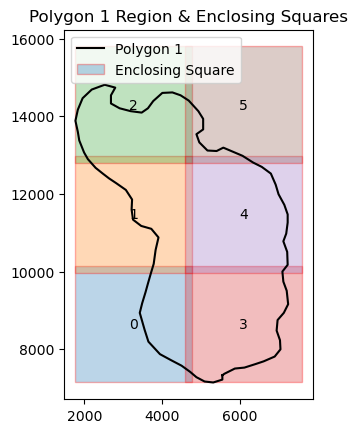

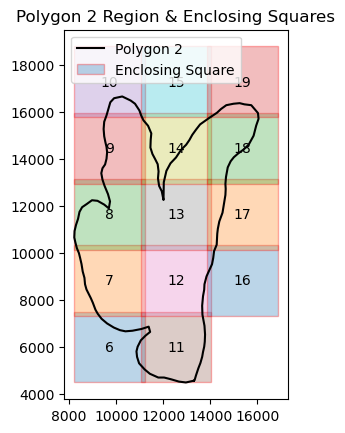

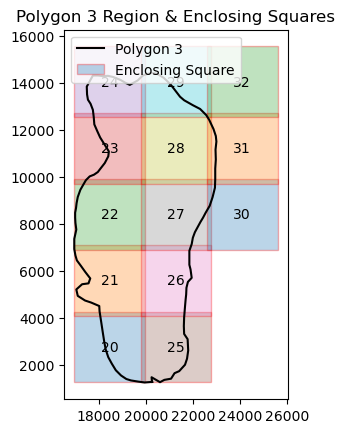

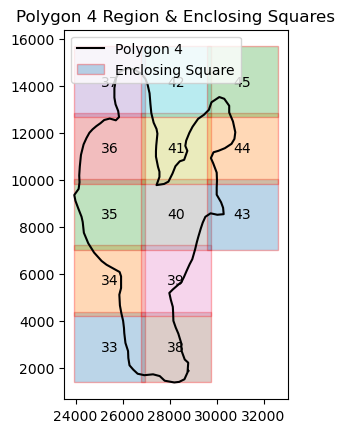

In [45]:
# Process all sections with continuous square numbering
polygon_number = 1
square_counter = 0  # Global square counter

for section in all_sections:
    
    # Get coordinates from section
    x_coords = section['x_coords']
    y_coords = section['y_coords']
    
    # Your original code block (unchanged)
    x_coords_rescaled = x_coords / pixelsize
    y_coords_rescaled = y_coords / pixelsize
    rescaled_polygon_roi = list(zip(x_coords_rescaled, y_coords_rescaled))
    
    # Create a Polygon object
    rescaled_polygon_roi = Polygon(rescaled_polygon_roi)
    
    # Define square size
    square_size = int(crop_size)
    overlap_size = 40/0.2125
    
    # Generate non-overlapping square regions
    overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, overlap_size=overlap_size, with_overlap=True)
    non_overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, with_overlap=False)
    
    # Plot with continuous numbering
    plot_polygon_and_squares_continuous(
        rescaled_polygon_roi,
        overlapping_squares,
        square_counter,  # Pass current counter
        title=f"Polygon {polygon_number} Region & Enclosing Squares",
        polygon_label=f"Polygon {polygon_number}",
        square_label="Enclosing Square"
    )
    
    # Update counters
    square_counter += len(overlapping_squares)  # Increment by number of squares
    polygon_number += 1

In [46]:
import tqdm

In [49]:
# import pandas as pd
# from shapely.geometry import Point, Polygon
# from shapely.prepared import prep

# # 1) Load your polygon
# polygon_coords = pd.read_csv(f"{base_path}/{sample_name}_coordinates.csv")
# polygon = Polygon(zip(polygon_coords['X'], polygon_coords['Y']))

# # 2) Build the bounding‐box filter
# minx, miny, maxx, maxy = polygon.bounds

# # 3) Prepare the polygon for fast repeated contains() checksimport pandas as pd
# from shapely.geometry import Point, Polygon
# from shapely.prepared import prep
# from tqdm import tqdm

# # Load transcripts once
# df = transcripts_b4_assign.copy()

# # Collect all filtered transcripts
# all_filtered_list = []

# # Process each section
# for section in all_sections:
#     print(f"\nProcessing {section['name']}...")
    
#     # 1) Create polygon for this section
#     polygon = Polygon(zip(section['x_coords'], section['y_coords']))
    
#     # 2) Build the bounding-box filter
#     minx, miny, maxx, maxy = polygon.bounds
    
#     # 3) Prepare the polygon for fast repeated contains() checks
#     prepared_poly = prep(polygon)
    
#     # 4) First, prefilter by bbox (very cheap)
#     mask_bbox = (
#         (df["x_location"] >= minx) &
#         (df["x_location"] <= maxx) &
#         (df["y_location"] >= miny) &
#         (df["y_location"] <= maxy)
#     )
#     df_bbox = df[mask_bbox]
    
#     print(f"{len(df_bbox)} of {len(df)} points lie in the bbox, now doing exact test...")
    
#     # 5) Now do the exact point-in-polygon test
#     filtered = []
#     for x, y in tqdm(zip(df_bbox["x_location"], df_bbox["y_location"]),
#                      total=len(df_bbox), 
#                      desc=f"Filtering {section['name']}"):
#         pt = Point(x, y)
#         if prepared_poly.contains(pt):
#             filtered.append(True)
#         else:
#             filtered.append(False)
    
#     transcripts_section = df_bbox[filtered]
#     print(f"Kept {len(transcripts_section)} points inside {section['name']}")
    
#     # Add to the master list
#     all_filtered_list.append(transcripts_section)

# # Combine all sections into one DataFrame
# transcripts_filtered = pd.concat(all_filtered_list, ignore_index=True)

# print(f"\n=== FINAL RESULT ===")
# print(f"Total transcripts_filtered: {len(transcripts_filtered)} transcripts from all sections")

# # Remove duplicates if any transcript appears in multiple sections
# transcripts_filtered = transcripts_filtered.drop_duplicates()
# print(f"After removing duplicates: {len(transcripts_filtered)} transcripts")
# prepared_poly = prep(polygon)

# # 4) Load transcripts
# df = transcripts_b4_assign.copy()

# # 5) First, prefilter by bbox (very cheap)
# mask_bbox = (
#     (df["x_location"] >= minx) &
#     (df["x_location"] <= maxx) &
#     (df["y_location"] >= miny) &
#     (df["y_location"] <= maxy)
# )
# df_bbox = df[mask_bbox]

# print(f"{len(df_bbox)} of {len(df)} points lie in the bbox, now doing exact test…")

# # 6) Now do the exact point-in-polygon test with a simple list comprehension
# from tqdm import tqdm
# filtered = []
# for x, y in tqdm(zip(df_bbox["x_location"], df_bbox["y_location"]),
#                  total=len(df_bbox)):
#     pt = Point(x, y)
#     if prepared_poly.contains(pt):
#         filtered.append(True)
#     else:
#         filtered.append(False)

# transcripts_filtered = df_bbox[filtered]
# print(f"Kept {len(transcripts_filtered)} points inside the actual polygon.")


In [48]:
# Load transcripts once
df = transcripts_b4_assign.copy()

# Collect all filtered transcripts
all_filtered_list = []

# Process each section (reuse existing polygon creation)
polygon_number = 1
square_counter = 0

for section in all_sections:
    
    # Get coordinates from section
    x_coords = section['x_coords']
    y_coords = section['y_coords']
    
    print(f"\nFiltering transcripts for Polygon {polygon_number}...")
    
    # Use ORIGINAL coordinates for transcript filtering (no pixelsize division)
    original_polygon = Polygon(zip(x_coords, y_coords))
    
    # Filter transcripts using the original polygon
    minx, miny, maxx, maxy = original_polygon.bounds
    prepared_poly = prep(original_polygon)
    
    # Prefilter by bbox
    mask_bbox = (
        (df["x_location"] >= minx) &
        (df["x_location"] <= maxx) &
        (df["y_location"] >= miny) &
        (df["y_location"] <= maxy)
    )
    df_bbox = df[mask_bbox]
    
    print(f"{len(df_bbox)} of {len(df)} points lie in the bbox, now doing exact test...")
    
    # Exact point-in-polygon test
    filtered = []
    for x, y in zip(df_bbox["x_location"], df_bbox["y_location"]):
        pt = Point(x, y)
        if prepared_poly.contains(pt):
            filtered.append(True)
        else:
            filtered.append(False)
    
    transcripts_section = df_bbox[filtered]
    print(f"Kept {len(transcripts_section)} points inside Polygon {polygon_number}")
    
    # Add to the master list
    all_filtered_list.append(transcripts_section)
    
    # Your existing square generation code (still uses rescaled coordinates)
    x_coords_rescaled = x_coords / pixelsize
    y_coords_rescaled = y_coords / pixelsize
    rescaled_polygon_roi = list(zip(x_coords_rescaled, y_coords_rescaled))
    rescaled_polygon_roi = Polygon(rescaled_polygon_roi)
    
    square_size = int(crop_size)
    overlap_size = 40/0.2125
    
    overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, overlap_size=overlap_size, with_overlap=True)
    non_overlapping_squares = crop_polygon_to_squares(rescaled_polygon_roi, square_size, with_overlap=False)
    
    # Update counters
    square_counter += len(overlapping_squares)
    polygon_number += 1

# Combine all sections into one DataFrame
transcripts_filtered = pd.concat(all_filtered_list, ignore_index=True)

print(f"\n=== FINAL RESULT ===")
print(f"Total transcripts_filtered: {len(transcripts_filtered)} transcripts from all sections")

# Remove duplicates if any transcript appears in multiple sections
transcripts_filtered = transcripts_filtered.drop_duplicates()
print(f"After removing duplicates: {len(transcripts_filtered)} transcripts")


Filtering transcripts for Polygon 1...
2388876 of 19441764 points lie in the bbox, now doing exact test...
Kept 2387376 points inside Polygon 1

Filtering transcripts for Polygon 2...
5718524 of 19441764 points lie in the bbox, now doing exact test...
Kept 5716602 points inside Polygon 2

Filtering transcripts for Polygon 3...
6185547 of 19441764 points lie in the bbox, now doing exact test...
Kept 6174375 points inside Polygon 3

Filtering transcripts for Polygon 4...
5130479 of 19441764 points lie in the bbox, now doing exact test...
Kept 5125899 points inside Polygon 4

=== FINAL RESULT ===
Total transcripts_filtered: 19404252 transcripts from all sections
After removing duplicates: 19404252 transcripts


In [50]:
transcripts_filtered

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index,codeword_category,is_gene
0,281569466045982,UNASSIGNED,0,Abhd5,496.531250,2747.031250,13.468750,40.0,E6,40.484375,10039,predesigned_gene,True
1,281569466076395,UNASSIGNED,0,Cct3,470.812500,2734.218750,13.500000,40.0,E6,68.562500,13449,predesigned_gene,True
2,281569466047272,UNASSIGNED,0,Mlec,497.093750,2737.328125,13.437500,40.0,E6,46.781250,10833,predesigned_gene,True
3,281569466029299,UNASSIGNED,0,Pias1,478.437500,2715.031250,13.437500,40.0,E6,75.828125,4372,predesigned_gene,True
4,281608120722026,jmchfkdd-1,0,A2m,449.437500,2974.906250,15.343750,40.0,F6,0.312500,15150,predesigned_gene,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19404247,281565171028374,UNASSIGNED,0,Ppp2r2b,6517.234375,2620.890625,13.687500,40.0,E16,31.015625,7293,predesigned_gene,True
19404248,281565171116878,UNASSIGNED,0,Rp2,6513.687500,2564.312500,13.656250,40.0,E16,45.937500,2035,predesigned_gene,True
19404249,281565171150496,UNASSIGNED,0,Slc2a4,6512.375000,2616.765625,13.734375,40.0,E16,24.890625,10295,predesigned_gene,True
19404250,281565171147207,UNASSIGNED,0,Syt4,6524.156250,2517.203125,14.078125,40.0,E16,73.875000,12142,predesigned_gene,True


In [51]:
transcripts_assigned = transcripts_filtered


In [52]:
import pandas as pd
from shapely.geometry import Point, Polygon
from rtree import index
from tqdm import tqdm

# 1) Build spatial index and polygon dict
spatial_idx = index.Index()
cell_polygons = {}

for cell_id, group in Outlines_list_final_scaled.groupby("cell_id"):
    poly = Polygon(zip(group["vertex_x"], group["vertex_y"]))
    cell_polygons[cell_id] = poly
    spatial_idx.insert(cell_id, poly.bounds)

# 2) Helper: single‐point lookup (no globals here)
def find_cell_id(x, y, spatial_index, polygons):
    pt = Point(x, y)
    # only test the few polygons whose bbox overlaps this point
    for cid in spatial_index.intersection((x, y, x, y)):
        if polygons[cid].contains(pt):
            return cid
    return "UNASSIGNED"

# 3) Main assigner with progress tracking
def assign_cell_ids_with_progress(df, spatial_index, polygons):
    """
    Iterates over df, finds each point’s cell_id via R-tree lookup,
    and shows a tqdm progress bar.
    Returns a list of cell_ids in the same order as df.
    """
    cell_ids = []
    # wrap the iterator in tqdm, giving a description and total count
    for row in tqdm(df.itertuples(index=False),
                    total=len(df),
                    desc="Assigning transcripts"):
        x, y = row.x_location, row.y_location
        pt = Point(x, y)
        # only test candidate polygons whose bbox overlaps this point
        cid = "UNASSIGNED"
        for candidate in spatial_index.intersection((x, y, x, y)):
            if polygons[candidate].contains(pt):
                cid = candidate
                break
        cell_ids.append(cid)

    return cell_ids

# Execution
transcripts_assigned["cell_id"] = assign_cell_ids_with_progress(
    transcripts_assigned,
    spatial_idx,
    cell_polygons
)
print("✅ Processing complete! All transcripts have been assigned a cell_id.")


Assigning transcripts: 100%|██████████| 19404252/19404252 [38:07<00:00, 8481.06it/s] 


✅ Processing complete! All transcripts have been assigned a cell_id.


In [53]:
transcripts_assigned_true = transcripts_assigned[transcripts_assigned["cell_id"] != "UNASSIGNED"]
transcripts_assigned_true

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index,codeword_category,is_gene
4,281608120722026,14573,0,A2m,449.437500,2974.906250,15.343750,40.00,F6,0.312500,15150,predesigned_gene,True
6,281569466069940,14518,1,Aatf,476.875000,2882.703125,15.078125,40.00,E6,0.000000,487,predesigned_gene,True
9,281608120729559,14533,1,Abca1,448.015625,2901.843750,18.328125,29.25,F6,0.000000,12880,predesigned_gene,True
10,281608120729576,14520,1,Abca1,451.531250,2885.031250,18.656250,29.50,F6,0.000000,12880,predesigned_gene,True
11,281569466021389,14513,1,Abca1,487.531250,2878.359375,15.828125,40.00,E6,0.000000,13244,predesigned_gene,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19404097,281565171053919,16658,0,Tuba1a,6430.843750,2788.765625,16.328125,40.00,E16,39.671875,12696,custom_gene,True
19404132,281565171048723,16658,0,Uri1,6429.109375,2795.531250,17.718750,40.00,E16,42.984375,17174,predesigned_gene,True
19404174,281565171083058,16658,0,Xist,6430.593750,2798.437500,15.578125,40.00,E16,45.515625,2890,predesigned_gene,True
19404184,281565171049843,16658,0,Ywhaz,6435.093750,2791.546875,14.062500,40.00,E16,44.734375,16974,predesigned_gene,True


In [54]:
import pandas as pd
import os

def create_folder_if_not_exists(path):
    """Create folder if it doesn't exist."""
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created directory: {path}")

gene_output_dir = f"{ddir}/gene_expression_matrix/{sample_name}"
create_folder_if_not_exists(gene_output_dir)

In [55]:
# Assuming transcripts_assigned_ture is your DataFrame
output_path = f"{ddir}/gene_expression_matrix/{sample_name}/transcripts_assigned_ture.parquet"

# Save the DataFrame as a Parquet file
transcripts_assigned_true.to_parquet(output_path, engine='pyarrow', index=False)

print(f"DataFrame saved successfully to {output_path}")

DataFrame saved successfully to D:\Alexis\Projects\SpatialOmics_cellpose\results/gene_expression_matrix/Test_Lesion_DRGs_1/transcripts_assigned_ture.parquet


In [ ]:
centroids_df

In [56]:
# Merge with centroids to add centroid coordinates, and scale centroid_x and centroid_y by 0.2125
centroids_df_scaled = centroids_df.copy()
centroids_df_scaled["centroid_x"] = centroids_df_scaled["centroid_x"] * 0.2125
centroids_df_scaled["centroid_y"] = centroids_df_scaled["centroid_y"] * 0.2125

In [57]:
transcripts_data = transcripts_assigned_true

# Create a pivot table for the gene expression matrix
gene_expression_matrix = (
    transcripts_data.groupby(["cell_id", "feature_name"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Add total counts column

gene_expression_matrix["Total Counts"] = gene_expression_matrix.drop(columns=["cell_id"]).sum(axis=1)
# Merge with centroids to add centroid coordinates
gene_expression_matrix = pd.merge(
    
    centroids_df_scaled,
    gene_expression_matrix,
    left_on="cell_id", 
    right_on="cell_id", 
    how='left')

In [58]:
gene_expression_matrix

,cell_id,centroid_x,centroid_y,A1cf,A2m,Aatf,Abca1,Abca13,Abca3,Abca4,...,Zp3,Zscan2,Zscan21,Zswim5,Zswim9,Zup1,Zyx,Zzef1,a,Total Counts
0,1,2294.712619,2757.055952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,285.0
1,2,2195.342404,2759.384423,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365.0
2,3,2330.707277,2759.797175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2185.212118,2761.349905,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,644.0
4,5,2187.892917,2768.529687,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20378,20379,2156.768750,2783.260491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0
20379,20380,2257.912581,2782.468145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
20380,20381,2173.516189,2788.865676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
20381,20382,2223.903571,2789.494005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
later_columns = gene_expression_matrix.columns[1:]

In [60]:
# Fill empty values with 0 for all columns after column 4
gene_expression_matrix[later_columns] = gene_expression_matrix[later_columns].fillna(0)

# Verify the changes
print("\nChecking if there are still any empty values:")
print(gene_expression_matrix[later_columns].isna().sum())

# Display a few rows to verify the changes
print("\nFirst few rows after filling empty values:")
print(gene_expression_matrix.head())


Checking if there are still any empty values:
centroid_x      0
centroid_y      0
A1cf            0
A2m             0
Aatf            0
               ..
Zup1            0
Zyx             0
Zzef1           0
a               0
Total Counts    0
Length: 11816, dtype: int64

First few rows after filling empty values:
   cell_id   centroid_x   centroid_y  A1cf  A2m  Aatf  Abca1  Abca13  Abca3  \
0        1  2294.712619  2757.055952   0.0  0.0   0.0    0.0     0.0    0.0   
1        2  2195.342404  2759.384423   0.0  0.0   1.0    0.0     0.0    0.0   
2        3  2330.707277  2759.797175   0.0  0.0   0.0    0.0     0.0    0.0   
3        4  2185.212118  2761.349905   0.0  0.0   1.0    0.0     0.0    0.0   
4        5  2187.892917  2768.529687   0.0  0.0   0.0    0.0     0.0    1.0   

   Abca4  ...  Zp3  Zscan2  Zscan21  Zswim5  Zswim9  Zup1  Zyx  Zzef1    a  \
0    0.0  ...  0.0     0.0      0.0     0.0     0.0   0.0  0.0    1.0  0.0   
1    0.0  ...  0.0     0.0      0.0     0.0     0.0 

In [112]:
import pandas as pd

# Change the file extension to .parquet
output_path = rf"{ddir}/gene_expression_matrix/{sample_name}/{sample_name}_gene_expression_matrix.parquet"

# Save as Parquet (much faster)
gene_expression_matrix.to_parquet(output_path, index=False)

print(f"DataFrame saved successfully to {output_path}")

DataFrame saved successfully to D:\Alexis\Projects\SpatialOmics_cellpose\results/gene_expression_matrix/Test_Lesion_DRGs_1/Test_Lesion_DRGs_1_gene_expression_matrix.parquet


In [62]:
# import pandas as pd

# # Assuming transcripts_assigned_ture is your DataFrame
# output_path = rf"{ddir}/gene_expression_matrix/{sample_name}/{sample_name}_gene_expression_matrix.csv"

# # Save the DataFrame as a Parquet file
# gene_expression_matrix.to_csv(output_path, index=False)

# print(f"DataFrame saved successfully to {output_path}")